# ForSys: non-invasive stress inference from time-lapse microscopy
Augusto Borges <sup>1, 2</sup>, Jerónimo  R. Miranda-Rodríguez <sup>1, 3</sup>, Alberto Sebastián Ceccarelli <sup>4</sup>, Guilherme Ventura<sup>5</sup>, Jakub Sedzinski <sup>5</sup>, Hernán López-Schier <sup>1,2,6</sup> & Osvaldo Chara <sup>7, 8, 9</sup>

1) Unit Sensory Biology, Helmholtz Zentrum München, Munich, Germany
2) Graduate School of Quantitative Biosciences (QBM), Munich, Germany
3) Instituto de Neurobiología, Universidad Nacional Autónoma de México (UNAM), Boulevard Juriquilla 3001, Juriquilla, México
4) Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET), University of La Plata, La Plata, Argentina
5) The Novo Nordisk Foundation Center for Stem Cell Medicine (reNEW), University of Copenhagen, Blegdamsvej 3B, 2200, Copenhagen, Denmark
6) Division of Science, New York University Abu Dhabi, Saadiyat Island, United Arab Emirates
7) School of Biosciences, University of Nottingham, Sutton Bonington Campus, Nottingham, LE12 5RD, UK
8) Instituto de Tecnología, Universidad Argentina de la Empresa, Buenos Aires, Argentina
9) Corresponding author: osvaldo.chara@nottingham.ac.uk

### Generate an inference in a single microscopy frame

In [1]:
import sys
sys.path.append('..')
import forsys as fs
import os
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = os.path.join("data", "in_vivo")
RESULTS_FOLDER = os.path.join("results")

# This is only necessary if you wish to create outputs
# if not os.path.exists(RESULTS_FOLDER):
#     os.makedirs(RESULTS_FOLDER)

#### Create the lattice from the desired time

In [3]:
tif_file = os.path.join(DATA_FOLDER, f"t_{1}.tif")

skeleton = fs.skeleton.Skeleton(tif_file, mirror_y=False)
vertices, edges, cells = skeleton.create_lattice()

vertices, edges, cells, _ = fs.virtual_edges.generate_mesh(vertices, edges, cells, ne=5)

#### Assign the frame object, and create the ForSys main object

In [4]:
frames = {}
frames[0] = fs.frames.Frame(0,
                            vertices,
                            edges,
                            cells)
forsys = fs.ForSys(frames)

#### Build and solve the system of equations for the force

In [5]:
forsys.build_force_matrix(when=0)
forsys.solve_stress(when=0, allow_negatives=False)

/home/augusto/doctorado/forsys/forsys_prs/forsys/examples/../forsys/fmatrix.py:317: UserWarning: Numerically solving due to the following error: Singular matrix
  warnings.warn(f"Numerically solving due to the following error: {e}")


#### Build and solve the system of equations for the pressure

In [6]:
forsys.build_pressure_matrix(when=0)
forsys.solve_pressure(when=0, method="lagrange_pressure")

#### Create system's plots

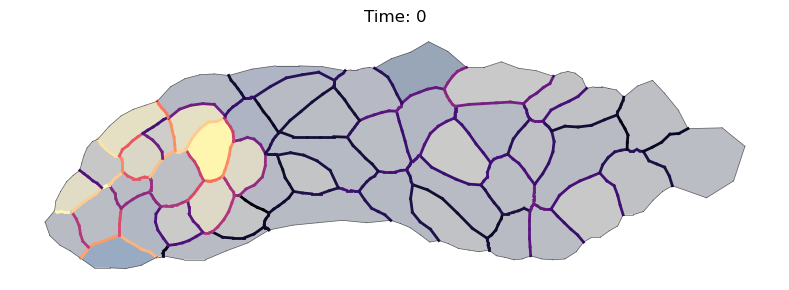

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3 ))

fs.plot.plot_inference(forsys.frames[0],
                                 normalized="max",
                                 mirror_y=True,
                                 colorbar=False,
                                 pressure=True,
                                 ax=ax)
ax.set_title(f"Time: {0}")
ax.axis("off")
plt.tight_layout()
plt.show()